In [263]:
from pathlib import Path

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import folium

import geojson
import requests

import osmnx as ox

# Retrieving info from OSM

## Create a graph of the road network

In [5]:
loc = "Valdidentro, Sondrio, Italy"

In [6]:
graph = ox.graph_from_place(loc)

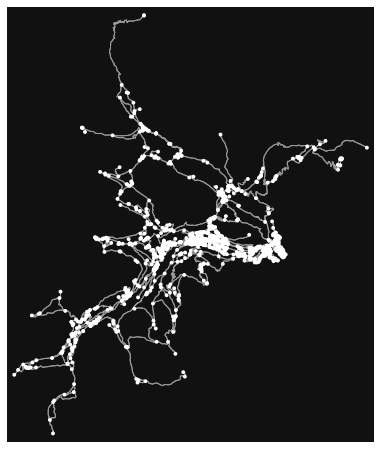

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [11]:
ox.plot_graph(G=graph)

In [51]:
loc2 = "Ottensen, Hamburg, Germany"

In [52]:
graph2 = ox.graph_from_place(loc2)

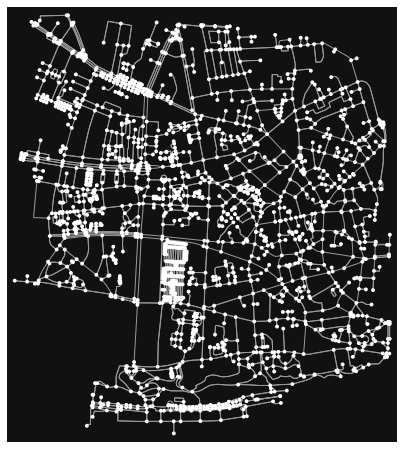

In [53]:
_, ax = ox.plot_graph(G=graph2)

In [13]:
type(graph2)

networkx.classes.multidigraph.MultiDiGraph

## Transform to geodataframe

In [55]:
# Separate geodataframe for nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
nodes2, edges2 = ox.graph_to_gdfs(graph2)

In [56]:
nodes.head()

y          x  street_count highway  \
osmid                                                  
80114214  46.493966  10.359830             4     NaN   
80114247  46.484150  10.365658             3     NaN   
80114625  46.484065  10.360293             3     NaN   
80114626  46.484974  10.359430             3     NaN   
80114637  46.489462  10.359580             3     NaN   

                           geometry  
osmid                                
80114214  POINT (10.35983 46.49397)  
80114247  POINT (10.36566 46.48415)  
80114625  POINT (10.36029 46.48407)  
80114626  POINT (10.35943 46.48497)  
80114637  POINT (10.35958 46.48946)

In [57]:
edges.head()

osmid    highway  oneway   length  \
u        v          key                                                       
80114214 4396367893 0                 441950253       path   False   37.910   
         3740790286 0    [398366196, 422102078]    primary   False  411.584   
         282155994  0                 422102078    primary   False  773.917   
80114247 798098187  0                  65283796       path   False   75.039   
80114625 3128098083 0                   9887187  secondary   False    3.593   

                        lanes    ref  \
u        v          key                
80114214 4396367893 0     NaN    NaN   
         3740790286 0       2   SS38   
         282155994  0       2   SS38   
80114247 798098187  0     NaN    NaN   
80114625 3128098083 0     NaN  SS301   

                                                                name maxspeed  \
u        v          key                                                         
80114214 4396367893 0                                            NaN      NaN   
         3740790286 0    [Strada Statale dello Stelvio, Via Stelvio]       60   
         282155994  0                                    Via Stelvio       60   
80114247 798098187  0                                            NaN      NaN   
80114625 3128098083 0                             Via Burroni D'Adda       50   

                                                                  geometry  \
u        v          key                                                      
80114214 4396367893 0    LINESTRING (10.35983 46.49397, 10.35939 46.49412)   
         3740790286 0    LINESTRING (10.35983 46.49397, 10.35996 46.493...   
         282155994  0    LINESTRING (10.35983 46.49397, 10.35960 46.494...   
80114247 798098187  0    LINESTRING (10.36566 46.48415, 10.36545 46.484...   
80114625 3128098083 0    LINESTRING (10.36029 46.48407, 10.36026 46.48408)   

                        width bridge service access tunnel junction  
u        v          key                                              
80114214 4396367893 0     NaN    NaN     NaN    NaN    NaN      NaN  
         3740790286 0     NaN    NaN     NaN    NaN    NaN      NaN  
         282155994  0     NaN    NaN     NaN    NaN    NaN      NaN  
80114247 798098187  0     NaN    NaN     NaN    NaN    NaN      NaN  
80114625 3128098083 0       6    NaN     NaN    NaN    NaN      NaN

In [58]:
area = ox.geocode_to_gdf(loc)
area2 = ox.geocode_to_gdf(loc2)

(10.115505324999999, 10.448769575, 46.369821474999995, 46.647996625000005)

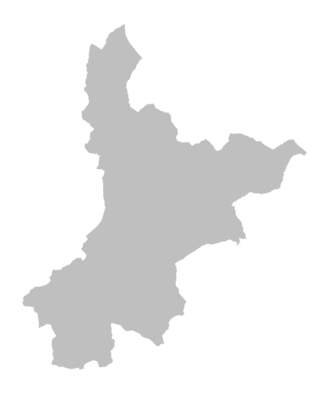

In [59]:
_, ax = plt.subplots(figsize=(7, 7))
area.plot(ax=ax,
          facecolor="gray", 
          edgecolor="white",
          linewidth=1,
          alpha=0.5
         )
ax.axis("off")

In [23]:
area.head()

geometry  bbox_north  bbox_south  \
0  POLYGON ((10.13065 46.43160, 10.13087 46.43162...   46.635352   46.382466   

   bbox_east  bbox_west   place_id  osm_type  osm_id        lat        lon  \
0  10.433621  10.130654  282228623  relation   47189  46.489037  10.292304   

                                        display_name     class  \
0  Valdidentro, Comunità montana Alta Valtellina,...  boundary   

             type  importance  
0  administrative    0.806537

In [60]:
area2.head()

geometry  bbox_north  bbox_south  \
0  POLYGON ((9.90935 53.54927, 9.91002 53.54924, ...   53.560068   53.541533   

   bbox_east  bbox_west   place_id  osm_type  osm_id        lat       lon  \
0   9.934888   9.909348  282277043  relation  183619  53.550812  9.922051   

                         display_name     class            type  importance  
0  Ottensen, Altona, Hamburg, Germany  boundary  administrative    0.749179

## Building footprints

In [61]:
buildings = ox.geometries_from_place(
    loc,
    tags={"building": True}
)
buildings2 = ox.geometries_from_place(
    loc2,
    tags={"building": True}
)

C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [26]:
buildings.head()

building   ele              name  \
element_type osmid                                         
node         429330330       yes  2311  Baita di Forcola   
             2419579195      yes   NaN               NaN   
way          68290336        yes   NaN               NaN   
             73054465        yes   NaN               NaN   
             82899977        yes   NaN               NaN   

                                                                  geometry  \
element_type osmid                                                           
node         429330330                           POINT (10.36159 46.54251)   
             2419579195                          POINT (10.30023 46.49279)   
way          68290336    POLYGON ((10.29552 46.47791, 10.29559 46.47785...   
             73054465    POLYGON ((10.27450 46.48732, 10.27467 46.48726...   
             82899977    POLYGON ((10.36126 46.47805, 10.36141 46.47808...   

                        tourism addr:housenumber addr:street level historic  \
element_type osmid                                                            
node         429330330      NaN              NaN         NaN   NaN      NaN   
             2419579195     NaN              NaN         NaN   NaN      NaN   
way          68290336       NaN              NaN         NaN   NaN      NaN   
             73054465       NaN              NaN         NaN   NaN      NaN   
             82899977       NaN              NaN         NaN   NaN      NaN   

                        memorial  ... stars tower:type power voltage military  \
element_type osmid                ...                                           
node         429330330       NaN  ...   NaN        NaN   NaN     NaN      NaN   
             2419579195      NaN  ...   NaN        NaN   NaN     NaN      NaN   
way          68290336        NaN  ...   NaN        NaN   NaN     NaN      NaN   
             73054465        NaN  ...   NaN        NaN   NaN     NaN      NaN   
             82899977        NaN  ...   NaN        NaN   NaN     NaN      NaN   

                        operator:website ref:vatin ways type building:levels  
element_type osmid                                                            
node         429330330               NaN       NaN  NaN  NaN             NaN  
             2419579195              NaN       NaN  NaN  NaN             NaN  
way          68290336                NaN       NaN  NaN  NaN             NaN  
             73054465                NaN       NaN  NaN  NaN             NaN  
             82899977                NaN       NaN  NaN  NaN             NaN  

[5 rows x 46 columns]

In [27]:
type(buildings)

geopandas.geodataframe.GeoDataFrame

## Points-of-interest

In [62]:
# Get restaurants

restaurants = ox.geometries_from_place(
    loc,
    tags={"amenity": "restaurant"}
)
restaurants2 = ox.geometries_from_place(
    loc2,
    tags={"amenity": "restaurant"}
)

In [30]:
restaurants.shape

(14, 22)

In [31]:
restaurants.head()

amenity  guest_house       key  \
element_type osmid                                           
node         1781743144  restaurant  agritourism  seasonal   
             2468696424  restaurant          NaN       NaN   
             4231821192  restaurant          NaN       NaN   
             4310484094  restaurant          NaN       NaN   
             4310719515  restaurant          NaN       NaN   

                                                name        phone  \
element_type osmid                                                  
node         1781743144                 Baita Caricc  0342 985381   
             2468696424  pizza d'asporto pasticceria          NaN   
             4231821192                     La Baita          NaN   
             4310484094       Agriturismo Alpe Boron          NaN   
             4310719515               Baita de l'All          NaN   

                             tourism                           website  \
element_type osmid                                                       
node         1781743144  guest_house  http://www.agriturismocaricc.com   
             2468696424          NaN                               NaN   
             4231821192          NaN                               NaN   
             4310484094          NaN                               NaN   
             4310719515          NaN                               NaN   

                                          geometry  cuisine microbrewery  ...  \
element_type osmid                                                        ...   
node         1781743144  POINT (10.19635 46.43013)      NaN          NaN  ...   
             2468696424  POINT (10.29580 46.48856)    pizza          NaN  ...   
             4231821192  POINT (10.35070 46.48559)  italian          NaN  ...   
             4310484094  POINT (10.27930 46.44781)  italian          NaN  ...   
             4310719515  POINT (10.26252 46.46740)  italian          yes  ...   

                        addr:country  ele addr:city addr:place addr:postcode  \
element_type osmid                                                             
node         1781743144          NaN  NaN       NaN        NaN           NaN   
             2468696424          NaN  NaN       NaN        NaN           NaN   
             4231821192          NaN  NaN       NaN        NaN           NaN   
             4310484094          NaN  NaN       NaN        NaN           NaN   
             4310719515          NaN  NaN       NaN        NaN           NaN   

                        email internet_access internet_access:fee  \
element_type osmid                                                  
node         1781743144   NaN             NaN                 NaN   
             2468696424   NaN             NaN                 NaN   
             4231821192   NaN             NaN                 NaN   
             4310484094   NaN             NaN                 NaN   
             4310719515   NaN             NaN                 NaN   

                        addr:housenumber addr:street  
element_type osmid                                    
node         1781743144              NaN         NaN  
             2468696424              NaN         NaN  
             4231821192              NaN         NaN  
             4310484094              NaN         NaN  
             4310719515              NaN         NaN  

[5 rows x 22 columns]

## Parks

In [69]:
tags = {"leisure": "park", "landuse": "grass"}

parks = ox.geometries_from_place(loc, tags)
parks2 = ox.geometries_from_place(loc2, tags)

In [70]:
parks.head()

nodes  \
element_type osmid                                                          
way          330118495  [3370802989, 3740810530, 3370802991, 337080299...   
             367802084  [3716821116, 3716821925, 3716821928, 371682193...   
             818061770  [7640294460, 7640294455, 7640294451, 764029445...   
             942883943  [8731087889, 8731087890, 8731087895, 873108789...   

                       leisure  \
element_type osmid               
way          330118495    park   
             367802084     NaN   
             818061770    park   
             942883943    park   

                                                                 geometry  \
element_type osmid                                                          
way          330118495  POLYGON ((10.35717 46.48687, 10.35744 46.48666...   
             367802084  POLYGON ((10.34995 46.48312, 10.34984 46.48325...   
             818061770  POLYGON ((10.29985 46.48945, 10.30035 46.48948...   
             942883943  POLYGON ((10.29909 46.48874, 10.29916 46.48865...   

                       landuse     name  
element_type osmid                       
way          330118495     NaN      NaN  
             367802084   grass  Planecc  
             818061770     NaN   Saleit  
             942883943     NaN      NaN

## Plot everything

(10.286, 10.305, 46.486, 46.491)

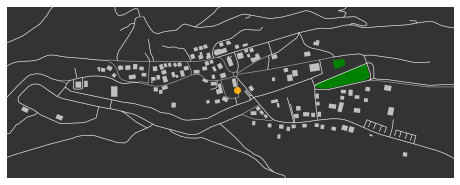

In [72]:
_, ax = plt.subplots(figsize=(8, 8))

area.plot(ax=ax,
          facecolor="black", 
          alpha=0.8)

edges.plot(ax=ax,
           edgecolor="white",
           linewidth=0.6,
           alpha=0.6
          )

# buildings are points or poligons
buildings.plot(ax=ax,
               color="silver",
               facecolor="silver")

# restaurants are point geometries
restaurants.plot(ax=ax,
                 color="orange",
                 facecolor="orange"
                )

# parks are polygons
parks.plot(ax=ax,
           color="green",
           facecolor="green"
          )

ax.set_xlim(10.286, 10.305)
ax.set_ylim(46.486, 46.491)
ax.axis("off")

(9.908055315, 9.936483385, 53.54059991, 53.56113449)

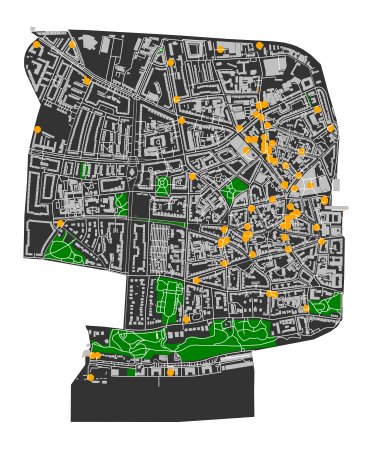

In [73]:
_, ax = plt.subplots(figsize=(8, 8))

area2.plot(ax=ax,
          facecolor="black", 
          alpha=0.8)

edges2.plot(ax=ax,
           edgecolor="white",
           linewidth=0.6,
           alpha=0.6
          )

# buildings are points or poligons
buildings2.plot(ax=ax,
               color="silver",
               facecolor="silver")

# restaurants are point geometries
restaurants2.plot(ax=ax,
                 color="orange",
                  facecolor="orange"
                 )

parks2.plot(ax=ax,
           color="green",
           facecolor="green"
          )

ax.axis("off")

# Network analysis

In [229]:
import networkx as nx
import contextily as cx
from pyproj import CRS

## Get data

We collect an area slightly larger than that of interest in case we need to exit it en route

In [179]:
loc = "Ottensen, Hamburg, Germany"

# Area polygon
poly = ox.geocode_to_gdf(loc)

# Project in a local CRS
poly = poly.to_crs(8395)

# Add buffer to the area (300 meters) - we get a new larger polygon
poly["geometry"] = poly.buffer(20)

# Reproject in standard WGS84 (lon, lat) as it is requestes my osmnx
poly = poly.to_crs(epsg=4326)

# Retrieve network for bikes in slightly larger area - we use graph_from_polygon instead
# graph_from_place
graph = ox.graph_from_polygon(poly["geometry"].values[0], network_type="bike")

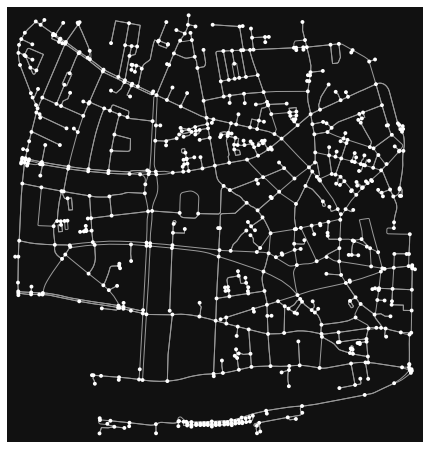

In [180]:
_, ax = ox.plot_graph(graph)

## Convert to geodataframes

In [181]:
# We only care about edges
edges = ox.graph_to_gdfs(graph, nodes=False)

In [182]:
edges.columns

Index(['osmid', 'oneway', 'name', 'highway', 'maxspeed', 'length', 'geometry',
       'lanes', 'service', 'tunnel', 'access'],
      dtype='object')

In [183]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [184]:
edges.head()

osmid  oneway                 name      highway  \
u      v          key                                                        
122372 82471400   0     27385218    True  Große Brunnenstraße  residential   
       269899387  0     31487723    True          Eulenstraße  residential   
       93121866   0     75573379   False  Große Brunnenstraße  residential   
131164 1580787897 0    813963116    True     Hohenzollernring    secondary   
       356652681  0     30472601    True        Bleickenallee  residential   

                      maxspeed   length  \
u      v          key                     
122372 82471400   0         30   86.369   
       269899387  0         30   51.040   
       93121866   0         30   81.283   
131164 1580787897 0         50   13.466   
       356652681  0         30  230.341   

                                                                geometry  \
u      v          key                                                      
122372 82471400   0    LINESTRING (9.92558 53.55080, 9.92562 53.55094...   
       269899387  0    LINESTRING (9.92558 53.55080, 9.92545 53.55082...   
       93121866   0    LINESTRING (9.92558 53.55080, 9.92538 53.55032...   
131164 1580787897 0      LINESTRING (9.91767 53.55121, 9.91767 53.55109)   
       356652681  0    LINESTRING (9.91767 53.55121, 9.91753 53.55122...   

                      lanes service tunnel access  
u      v          key                              
122372 82471400   0     NaN     NaN    NaN    NaN  
       269899387  0     NaN     NaN    NaN    NaN  
       93121866   0     NaN     NaN    NaN    NaN  
131164 1580787897 0       2     NaN    NaN    NaN  
       356652681  0     NaN     NaN    NaN    NaN

In [185]:
edges.isnull().sum()

osmid          0
oneway         0
name         722
highway        0
maxspeed     788
length         0
geometry       0
lanes       1248
service     1169
tunnel      1521
access      1525
dtype: int64

In [186]:
edges["highway"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


service                         653
residential                     614
tertiary                        126
secondary                       122
path                             80
living_street                     8
cycleway                          6
unclassified                      6
pedestrian                        4
[service, path]                   4
[living_street, residential]      2
[pedestrian, residential]         2
[service, residential]            2
[cycleway, residential]           2
secondary_link                    1
Name: highway, dtype: int64

## Project to CRS for distance analysis

We can actually project the original graph rather than the geodataframe. OSMnx takes care of selecting a crs. In particular it uses the UTM projection for the appropriate zone for the location

In [187]:
# Project graph
graph_proj = ox.project_graph(graph)

# Get geodataframes of edges and nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj)

In [188]:
edges_proj.crs

<Derived Projected CRS: +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [189]:
# To extract epsg code

CRS(edges_proj.crs).to_epsg()

32632

## Analysis of network properties

In [190]:
# Basic stats summary of the network
stats = ox.basic_stats(graph_proj)

In [191]:
stats

{'n': 738,
 'm': 1632,
 'k_avg': 4.4227642276422765,
 'edge_length_total': 89447.50400000013,
 'edge_length_avg': 54.808519607843216,
 'streets_per_node_avg': 2.573170731707317,
 'streets_per_node_counts': {0: 0, 1: 206, 2: 5, 3: 429, 4: 94, 5: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2791327913279133,
  2: 0.006775067750677507,
  3: 0.5813008130081301,
  4: 0.12737127371273713,
  5: 0.005420054200542005},
 'intersection_count': 532,
 'street_length_total': 51902.531999999985,
 'street_segment_count': 927,
 'street_length_avg': 55.98978640776697,
 'circuity_avg': 1.0533741069115274,
 'self_loop_proportion': 0.007551240560949299}

### Calculate area to obtain more detailed stats

In [192]:
# We can follow two paths

# From edges geodataframe
convex_hull = edges_proj.unary_union.convex_hull
area = convex_hull.area

# From polygon
area2 = (poly
         .to_crs(epsg=32632)
         .unary_union
         .area)

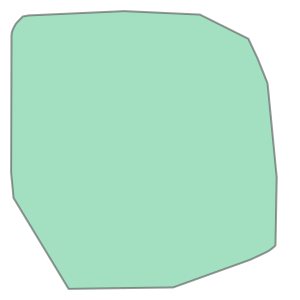

In [193]:
convex_hull

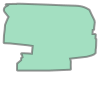

In [194]:
poly["geometry"].values[0]

In [195]:
print(area)
print(area2)

2736605.076900888
2944925.2984445705


The problem with the second approach could be that there is a larger part of Ottensen on the river banks, which does not have roads

In [196]:
# Calculate stats with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj)

C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\osmnx\stats.py:458: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)
C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:107: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


## Shortest path analysis

In [197]:
start = "Klausstrasse 20, Ottensen, Germany"
end = "Freiwillige Feuerwehr Ottensen-Bahrenfeld, Ottensen, Germany"

In [198]:
geocoded_start = ox.geocode_to_gdf(start)
geocoded_end = ox.geocode_to_gdf(end)

In [199]:
geocoded_start

geometry  bbox_north  bbox_south  \
0  POLYGON ((9.93164 53.55006, 9.93176 53.54999, ...   53.550198   53.549987   

   bbox_east  bbox_west   place_id osm_type    osm_id        lat       lon  \
0   9.931852   9.931636  119730057      way  76964956  53.550077  9.931743   

                                        display_name     class        type  \
0  20, Klausstraße, Ottensen, Altona, Hamburg, 22...  building  apartments   

   importance  
0       0.331

### Project to correct CRS

In [200]:
geocoded_start = geocoded_start.to_crs(CRS(edges_proj.crs))
geocoded_end = geocoded_end.to_crs(CRS(edges_proj.crs))

### Get centroid locations to use as actual origin and destination points

In [201]:
origin = geocoded_start["geometry"].centroid.values[0]
destination = geocoded_end["geometry"].centroid.values[0]

In [202]:
print(origin)

POINT (561731.630145525 5933870.476975066)


### Find nearest nodes on the graph to be used

We find node in the graph closest to origin point, we need to pass coordinates.
The function `distance.nearest_nodes` automatically understands if the graph is projected.

In [203]:
origin_node_id = ox.distance.nearest_nodes(G=graph_proj,
                                           X=origin.x, 
                                           Y=origin.y)
print(f"Node ID for the origin point is: {origin_node_id}")
destination_node_id = ox.distance.nearest_nodes(G=graph_proj,
                                                X=destination.x,
                                                Y=destination.y)
print(f"Node ID for the origin point is: {destination_node_id}")

Node ID for the origin point is: 87828173
Node ID for the origin point is: 6540648130


We then use the node id to retrieve the actual nodes and put them in a GeoDataFrame

In [204]:
nodes_proj.head()

y              x  street_count       lon        lat  \
osmid                                                                       
122372     5.933944e+06  561322.099951             4  9.925584  53.550800   
82471400   5.934030e+06  561329.476012             4  9.925712  53.551572   
269899387  5.933949e+06  561271.326239             3  9.924819  53.550850   
93121866   5.933865e+06  561300.968185             4  9.925249  53.550097   
131164     5.933983e+06  560797.310826             4  9.917671  53.551209   

          highway                        geometry  
osmid                                              
122372        NaN  POINT (561322.100 5933943.751)  
82471400      NaN  POINT (561329.476 5934029.823)  
269899387     NaN  POINT (561271.326 5933948.644)  
93121866      NaN  POINT (561300.968 5933865.267)  
131164        NaN  POINT (560797.311 5933982.546)

In [205]:
travel_nodes = gpd.GeoDataFrame(
    data=nodes_proj.loc[nodes_proj.index.isin([origin_node_id, destination_node_id])],
    geometry="geometry",
    crs=nodes_proj.crs)

In [206]:
travel_nodes

y              x  street_count       lon        lat  \
osmid                                                                        
87828173    5.933893e+06  561763.130406             3  9.932230  53.550295   
6540648130  5.934760e+06  560297.437538             1  9.910277  53.558257   

           highway                        geometry  
osmid                                               
87828173       NaN  POINT (561763.130 5933893.313)  
6540648130     NaN  POINT (560297.438 5934760.236)

In [207]:
np.c_[geocoded_start, geocoded_end]

array([[<shapely.geometry.polygon.Polygon object at 0x000001C586AC0CA0>,
        53.5501976, 53.5499868, 9.9318516, 9.9316357, 119730057, 'way',
        76964956, 53.5500769, 9.931743193749998,
        '20, Klausstraße, Ottensen, Altona, Hamburg, 22765, Germany',
        'building', 'apartments', 0.33100000000000007,
        53.5583851, 53.5580522, 9.9112896, 9.9108805, 130216259, 'way',
        126623942, 53.55823925, 9.911090196888095,
        'Freiwillige Feuerwehr Ottensen-Bahrenfeld, 5d, Friesenweg, Ottensen, Altona, Hamburg, 22763, Germany',
        'amenity', 'fire_station', 0.6309999999999999]], dtype=object)

In [208]:
# We also create the geodataframe for the actual origin and destination
travel_points = gpd.GeoDataFrame(
    data=pd.concat([geocoded_start, geocoded_end]),
    geometry="geometry",
    crs=edges_proj.crs)

### Quick plot

In [209]:
buildings = ox.geometries_from_place(loc,
                                     tags={"building": True})

C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


<AxesSubplot:>

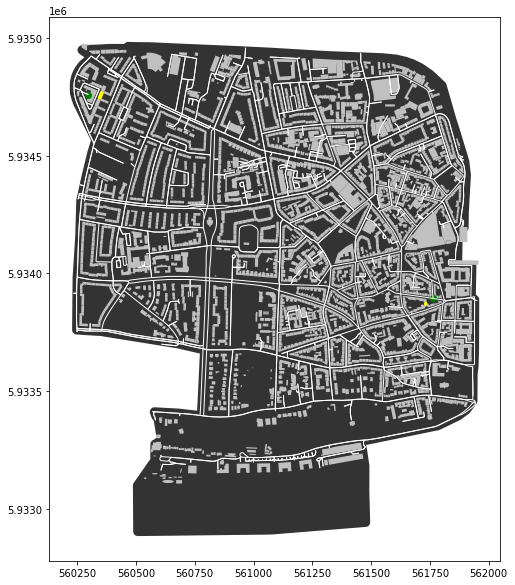

In [210]:
_, ax = plt.subplots(figsize=(10, 10))
(poly
 .to_crs(crs=edges_proj.crs)
 .plot(ax=ax,
       facecolor="black",
       alpha=0.8
      )
)
edges_proj.plot(ax=ax,
                edgecolor="white", 
                linewidth=1
               )
(buildings
 .to_crs(crs=edges_proj.crs)
 .plot(ax=ax,
       facecolor="silver",
       color="silver"
      )
)
travel_points.plot(ax=ax,
                   color="yellow"
                  )
travel_nodes.plot(ax=ax,
                  color="green"
                 )

### Routing

In [212]:
# Calculate shortest path
route = nx.shortest_path(
    G=graph_proj,
    source=origin_node_id,
    target=destination_node_id,
    weight="length")

The output is a list of all the nodes that are along the shortest path.
We now have two options for plotting the path.
On one side we can use the built in functions from the OSMnx package.

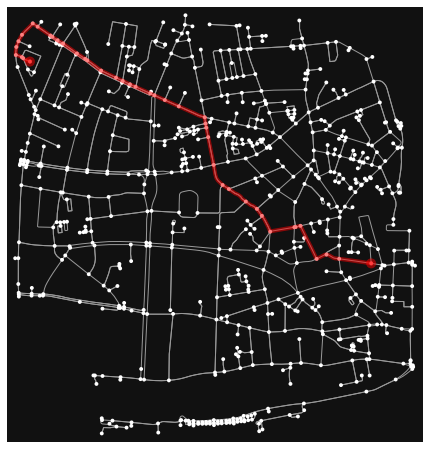

In [213]:
_, ax = ox.plot_graph_route(G=graph_proj, 
                            route=route)

Alternatively one can create a Linestring from the route and visualize it on a standard plot. The variable `route` is a list of nodes ids so we can use it to select a subsection of the nodes in the graph.

In [220]:
route_nodes = nodes_proj.loc[route]

In [222]:
from shapely.geometry import LineString

In [223]:
route_path = LineString(route_nodes["geometry"].values)

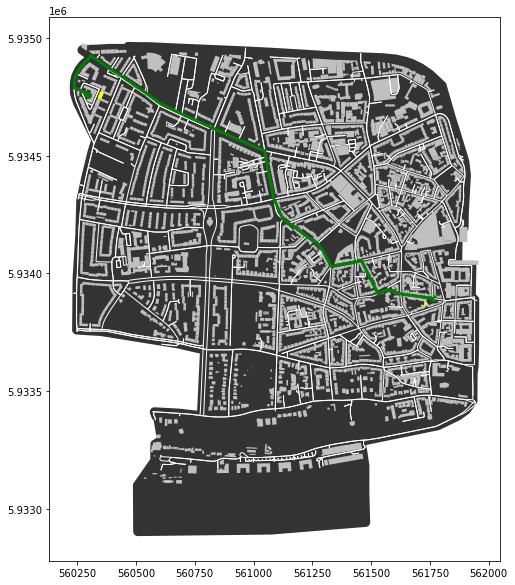

In [243]:
_, ax = plt.subplots(figsize=(10, 10))
(poly
 .to_crs(crs=edges_proj.crs)
 .plot(ax=ax,
       facecolor="black",
       alpha=0.8
      )
)
edges_proj.plot(ax=ax,
                edgecolor="white", 
                linewidth=1
               )
(buildings
 .to_crs(crs=edges_proj.crs)
 .plot(ax=ax,
       facecolor="silver",
       color="silver"
      )
)
travel_points.plot(ax=ax,
                   color="yellow"
                  )
travel_nodes.plot(ax=ax,
                  color="green"
                 )
ax.plot(route_path.coords.xy[0],
        route_path.coords.xy[1],
        color="green",
        linewidth=3
       )

## Save route

We make a geodataframe out of the route (Linestring)

In [245]:
route_geom = gpd.GeoDataFrame(
    data=[[route_path]],
    columns=["geometry"],
    geometry="geometry",
    crs=edges_proj.crs)

In [249]:
route_nodes.head()

y              x  street_count       lon        lat  \
osmid                                                                        
87828173    5.933893e+06  561763.130406             3  9.932230  53.550295   
230536161   5.933913e+06  561625.709282             4  9.930160  53.550488   
6319294737  5.933931e+06  561571.170589             3  9.929340  53.550657   
8191055004  5.933912e+06  561528.886797             3  9.928698  53.550495   
1574464517  5.934055e+06  561459.249792             3  9.927675  53.551780   

           highway                        geometry  
osmid                                               
87828173       NaN  POINT (561763.130 5933893.313)  
230536161      NaN  POINT (561625.709 5933913.013)  
6319294737     NaN  POINT (561571.171 5933931.150)  
8191055004     NaN  POINT (561528.887 5933912.495)  
1574464517     NaN  POINT (561459.250 5934054.577)

In [251]:
route_geom = (route_geom
              .assign(
                  osmids=[list(route_nodes.index.values)],
                  route_length=lambda x:x.length
              )
             )

In [252]:
route_geom

geometry  \
0  LINESTRING (561763.130 5933893.313, 561625.709...   

                                              osmids  route_length  
0  [87828173, 230536161, 6319294737, 8191055004, ...   2200.200564

# Exercises

## 1

In [232]:
from pyproj import CRS
from shapely.geometry import Point, LineString

In [233]:
DATA_PATH = Path("../data/exercise-6")

In [234]:
origins_df = pd.read_csv(DATA_PATH / "origins.csv")
destinations_df = pd.read_csv(DATA_PATH / "destinations.csv")

In [235]:
origins_df = (origins_df
              .assign(
                  geometry=lambda y:y.apply(
                      lambda x:Point(x["x"], x["y"]),
                      axis=1
                  )
              )
              .drop(["x", "y"], axis=1)
             )
destinations_df = (destinations_df
                   .assign(
                       geometry=lambda y:y.apply(
                           lambda x:Point(x["x"], x["y"]),
                           axis=1
                       )
                   )
                   .drop(["x", "y"], axis=1)
                  )

C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [236]:
eagle_paths_df = (origins_df.join(destinations_df, lsuffix="_origin", rsuffix="_dest")
                  .assign(
                      geometry=lambda y:y.apply(
                          lambda x:LineString((x["geometry_origin"], x["geometry_dest"])),
                          axis=1
                      )
                  )
                  .drop(["geometry_origin", "geometry_dest"], axis=1)
                 )

C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [237]:
origins_gdf = gpd.GeoDataFrame(
    data=origins_df,
    geometry="geometry",
    crs=CRS.from_epsg(4326)
)
destinations_gdf = gpd.GeoDataFrame(
    data=destinations_df,
    geometry="geometry",
    crs=CRS.from_epsg(4326)
)
eagle_paths_gdf = gpd.GeoDataFrame(
    data=eagle_paths_df,
    geometry="geometry",
    crs=CRS.from_epsg(4326)
)

### Plot on map

In [238]:
import contextily as cx

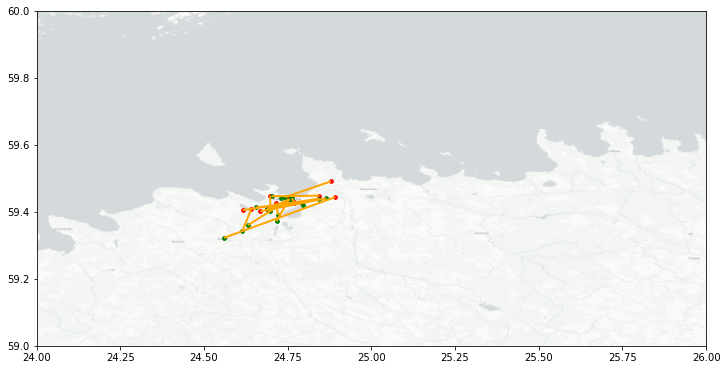

In [239]:
_, ax = plt.subplots(figsize=(12, 12))
ax.set_xlim(24, 26)
ax.set_ylim(59, 60)
origins_gdf.plot(
    ax=ax,
    color="red",
    markersize=14
)
destinations_gdf.plot(
    ax=ax,
    color="green",
    markersize=14
)
eagle_paths_gdf.plot(
    ax=ax,
    edgecolor="orange",
    linewidth=2
)
cx.add_basemap(ax=ax,
               source=cx.providers.CartoDB.Positron,
               zoom=10,
               attribution="",
               crs=origins_gdf.crs,
               # reset_extent=True
              )


### Reverse geocode

In [240]:
from geopy.geocoders import Nominatim

In [241]:
geolocator = Nominatim(user_agent="exercise-6")

In [242]:
origins_gdf = (origins_gdf
               .assign(
                   address=lambda y:y.apply(
                       lambda x:geolocator.reverse([x["geometry"].y, x["geometry"].x]),
                       axis=1
                   )
               )
              )

In [243]:
origins_gdf.head()

geometry  \
0  POINT (24.61590 59.40520)   
1  POINT (24.64070 59.40740)   
2  POINT (24.66860 59.40180)   
3  POINT (24.69800 59.44770)   
4  POINT (24.76800 59.43030)   

                                             address  
0  (Astangu Rimi super, 4, Kotermaa, Astangu, Haa...  
1  (Grossi Toidukaubad, 35b, Järveotsa tee, Väike...  
2  (41, Ehitajate tee, Mustamäe, Mustamäe linnaos...  
3  (Grossi, 3, Kari, Pelguranna, Põhja-Tallinna l...  
4  (Grossi Toidukaubad, 14, Lastekodu, Keldrimäe,...

### Extract OpenStreetMap data

#### Find polygong that covers points of interest

In [244]:
from shapely.geometry import Polygon, box

In [245]:
all_points = origins_gdf.append(destinations_gdf)

In [246]:
# Create geodataframe with area of interest polygon
aoi = gpd.GeoDataFrame(
    geometry="geometry",
    columns=["descritpion", "geometry"],
    data=[["area of interest", all_points.unary_union.convex_hull]],
    crs=origins_gdf.crs
)

In [247]:
aoi

descritpion                                           geometry
0  area of interest  POLYGON ((24.55980 59.32240, 24.61590 59.40520...

In [248]:
# Project the area so we can add a buffer 
aoi = ox.project_gdf(aoi)

In [249]:
# Add buffer of 5000 meters
aoi["geometry"] = aoi.buffer(3000)

In [250]:
aoi

descritpion                                           geometry
0  area of interest  POLYGON ((362627.618 6575892.207, 362364.631 6...

#### Fetch street graph for area of interest

In [251]:
# Reproject in standard WGS84 (lon, lat) as it is requestes my osmnx
aoi = aoi.to_crs(epsg=4326)

In [252]:
street_graph = ox.graph_from_polygon(
    polygon=aoi["geometry"].values[0], 
    network_type="drive",
)

In [253]:
# Project graph into UTM for distance analysis
street_graph_proj = ox.project_graph(street_graph)

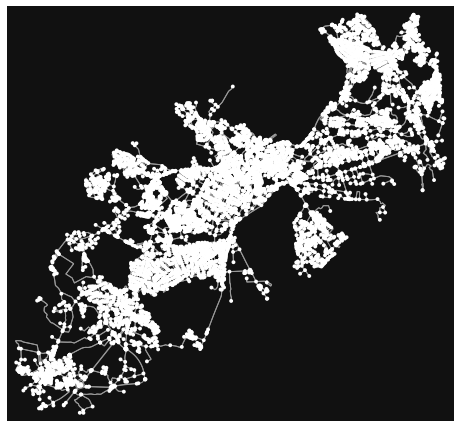

In [254]:
_, ax = ox.plot_graph(street_graph_proj)

In [255]:
nodes_proj, edges_proj = ox.graph_to_gdfs(street_graph_proj)

#### Plot map and point

In [256]:
# Project to correct crs
aoi = ox.project_gdf(aoi)
origins_gdf = ox.project_gdf(origins_gdf)
destinations_gdf = ox.project_gdf(destinations_gdf)

<AxesSubplot:>

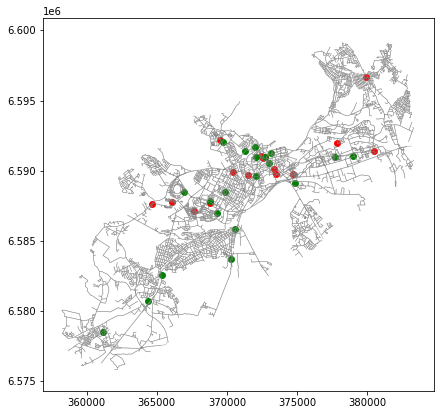

In [257]:
_, ax = plt.subplots(figsize=(7, 7))

aoi.plot(
    ax=ax,
    facecolor="white"
)
edges_proj.plot(
    ax=ax,
    edgecolor="gray",
    linewidth=0.5,
    alpha=0.7
)
origins_gdf.plot(
    ax=ax,
    color="red", 
    markersize=35
)
destinations_gdf.plot(
    ax=ax,
    color="green",
    markersize=35
)
# ax.axis("off")

## 2 - Calculate shortest paths

In [258]:
origins_gdf.crs

<Derived Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [259]:
destinations_gdf.crs

<Derived Projected CRS: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Identify closest nodes

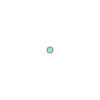

In [271]:
nodes_proj.loc[341986868, "geometry"]

In [274]:
origins_gdf = (origins_gdf
               .assign(
                   closest_node_id=lambda y:y.apply(
                       lambda x:ox.distance.nearest_nodes(street_graph_proj,
                                                          x["geometry"].x,
                                                          x["geometry"].y),
                       axis=1
                   ),
                   closest_node=lambda y:y.apply(
                       lambda x:nodes_proj.loc[x["closest_node_id"], "geometry"], 
                       axis=1
                   )
               )
              )
destinations_gdf = (destinations_gdf
                    .assign(
                        closest_node_id=lambda y:y.apply(
                            lambda x:ox.distance.nearest_nodes(street_graph_proj,
                                                               x["geometry"].x,
                                                               x["geometry"].y),
                            axis=1
                        ),
                        closest_node=lambda y:y.apply(
                            lambda x:nodes_proj.loc[x["closest_node_id"], "geometry"], 
                            axis=1
                        )
                    )
                   )

C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\andri\anaconda3\envs\python-gis\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [275]:
origins_gdf.head()

geometry  \
0  POINT (364659.492 6587597.013)   
1  POINT (366075.637 6587791.721)   
2  POINT (367637.096 6587112.547)   
3  POINT (369482.650 6592163.774)   
4  POINT (373385.475 6590091.584)   

                                             address  closest_node_id  \
0  (Astangu Rimi super, 4, Kotermaa, Astangu, Haa...        341986868   
1  (Grossi Toidukaubad, 35b, Järveotsa tee, Väike...        297425570   
2  (41, Ehitajate tee, Mustamäe, Mustamäe linnaos...       1262556101   
3  (Grossi, 3, Kari, Pelguranna, Põhja-Tallinna l...       1769386593   
4  (Grossi Toidukaubad, 14, Lastekodu, Keldrimäe,...         10580988   

                                   closest_node  
0   POINT (364723.4496692803 6587654.149080118)  
1   POINT (366059.5773160917 6587804.628828187)  
2   POINT (367621.0629812442 6587094.017340454)  
3   POINT (369509.34110663796 6592221.86223263)  
4  POINT (373428.65960259124 6590099.886592906)

### Create geodataframe of shortest path

In [310]:
def calculate_shortest_path(graph, origin_node_id, destination_node_id):
    node_id_route = nx.shortest_path(graph,
                                     source=origin_node_id,
                                     target=destination_node_id,
                                     weight="length")
    node_route = nodes_proj.loc[node_id_route]
    route = LineString(node_route["geometry"].values)
    return route


def calculate_all_shortest_paths(graph, origins_gdf, destinations_gdf):
    entries = []
    for i, or_row in origins_gdf.iterrows():
        for j, dest_row in destinations_gdf.iterrows():
            if or_row["closest_node_id"] == dest_row["closest_node_id"]:
                pass
            else:
                origin_point = or_row["geometry"]
                origin_node = or_row["closest_node"]
                origin_node_id = or_row["closest_node_id"]
                destination_point = dest_row["geometry"]
                destination_node = dest_row["closest_node"]
                destination_node_id = dest_row["closest_node_id"]
                route = calculate_shortest_path(graph,
                                                origin_node_id,
                                                destination_node_id)
                entries.append([origin_point, origin_node, origin_node_id,
                                destination_point, destination_node, destination_node_id,
                                route])
    path_gdf = gpd.GeoDataFrame(
        data=entries,
        columns=["origin_point", "origin_closest_node", "origin_node_id",
                 "destination_point", "destination_closest_node", "destination_node_id",
                 "route"],
        geometry="route",
        crs=origins_gdf.crs
    )
    return path_gdf

In [311]:
path_gdf = calculate_all_shortest_paths(street_graph_proj, origins_gdf, destinations_gdf)

In [312]:
path_gdf.head()

origin_point  \
0  POINT (364659.49207826867 6587597.013411126)   
1  POINT (364659.49207826867 6587597.013411126)   
2  POINT (364659.49207826867 6587597.013411126)   
3  POINT (364659.49207826867 6587597.013411126)   
4  POINT (364659.49207826867 6587597.013411126)   

                           origin_closest_node  origin_node_id  \
0  POINT (364723.4496692803 6587654.149080118)       341986868   
1  POINT (364723.4496692803 6587654.149080118)       341986868   
2  POINT (364723.4496692803 6587654.149080118)       341986868   
3  POINT (364723.4496692803 6587654.149080118)       341986868   
4  POINT (364723.4496692803 6587654.149080118)       341986868   

                              destination_point  \
0  POINT (377734.59123538213 6590973.364956819)   
1   POINT (364361.46922221937 6580708.71611378)   
2   POINT (378957.1981485278 6591045.366651985)   
3  POINT (369320.91825996456 6586998.190812081)   
4  POINT (373140.84917677596 6591258.808912848)   

                        destination_closest_node  destination_node_id  \
0  POINT (377734.41063467687 6590934.0000983635)            614466115   
1    POINT (364243.8092403583 6580815.882971051)           3092027759   
2    POINT (379022.9508683005 6591007.876283582)           2571675809   
3   POINT (369207.69528179057 6587083.087526137)             11790828   
4   POINT (373195.50476555526 6591278.947421282)            790046528   

                                               route  
0  LINESTRING (364723.450 6587654.149, 364688.064...  
1  LINESTRING (364723.450 6587654.149, 364688.064...  
2  LINESTRING (364723.450 6587654.149, 364688.064...  
3  LINESTRING (364723.450 6587654.149, 365376.539...  
4  LINESTRING (364723.450 6587654.149, 364688.064...

In [313]:
# Add route length
path_gdf = (path_gdf
            .assign(
                route_length=lambda x:x.length
            )
           )

### Plot everything

For clarity we plot all the routes originating from a single origin: 

In [315]:
to_plot = path_gdf.loc[path_gdf["origin_node_id"] == path_gdf.loc[0, "origin_node_id"]]

In [316]:
import matplotlib.cm as cm

In [321]:
colors = cm.Dark2(np.linspace(0, 1, len(to_plot)))

<AxesSubplot:>

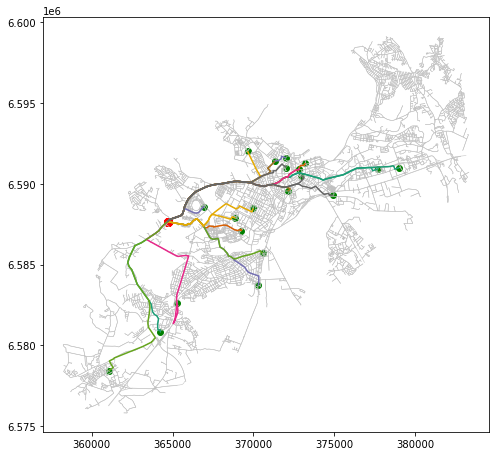

In [324]:
_, ax = plt.subplots(figsize=(8, 8))

edges_proj.plot(
    ax=ax,
    edgecolor="silver",
    linewidth=0.5
)
(to_plot
 .set_geometry("origin_closest_node")
 .plot(
     ax=ax,
     c="red",
     markersize=60
 )
)
(to_plot
 .set_geometry("destination_closest_node")
 .plot(
     ax=ax,
     c="green",
     markersize=35
 )
)
to_plot.plot(
    ax=ax,
    linewidth=1.5,
    color=colors
)


In [326]:
total_distance = path_gdf["route_length"].sum()
print(f"The total traveled length is: {total_distance/1000} chilometers")

The total traveled length is: 2459.303585371949 chilometers
